In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
results_path = "/home/akamath/Documents/toskipornot/reports"

model_list = ["UNet++", "AttentionUNet", "UNet", "VNet", "NoSkipUNet", "NoSkipVNet"]
anatomy_list = ["BUSI", "GLaS", "Heart", "Spleen"]
variant_list = ["lower", "low", "in-domain", "high", "higher"]

For texture variant: lower mean scores;
            UNet++ AttentionUNet        UNet        VNet NoSkipUNet  \
BUSI     55.004668     23.838157   37.424352   21.146936  26.401135   
GLaS     32.189114     28.807466   32.289809   29.172389   33.29598   
Heart   359.141408     68.385874  163.450497    3.124445   2.403867   
Spleen  361.626853     53.235226  230.787126  349.002514  40.775815   

        NoSkipVNet  
BUSI     10.680696  
GLaS      27.98573  
Heart     1.435238  
Spleen  125.179297  
For texture variant: lower std scores;
           UNet++ AttentionUNet        UNet       VNet NoSkipUNet  NoSkipVNet
BUSI    21.589514      23.57217   73.495264  56.992318   59.38691   37.542083
GLaS    66.295493     66.851119   66.478836  66.968523  66.138321   66.958628
Heart   31.605549     27.667071  175.650723  18.984621   1.259114    0.811588
Spleen  10.475116     33.775422  153.876105  60.041917  90.919533  163.023388
For texture variant: low mean scores;
            UNet++ AttentionUNet

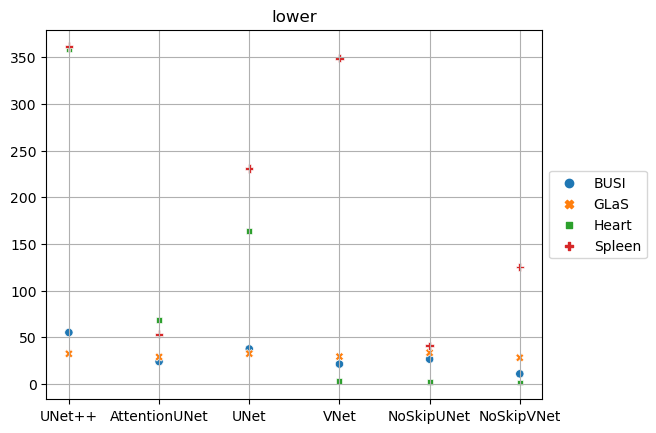

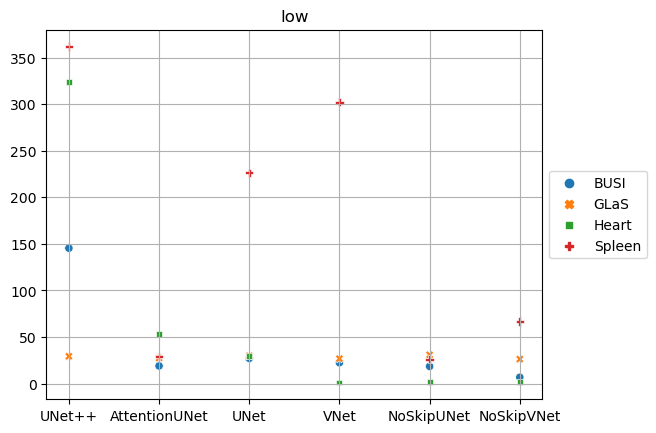

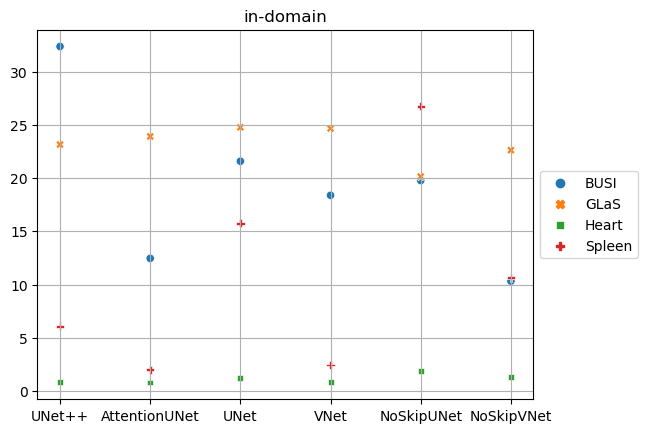

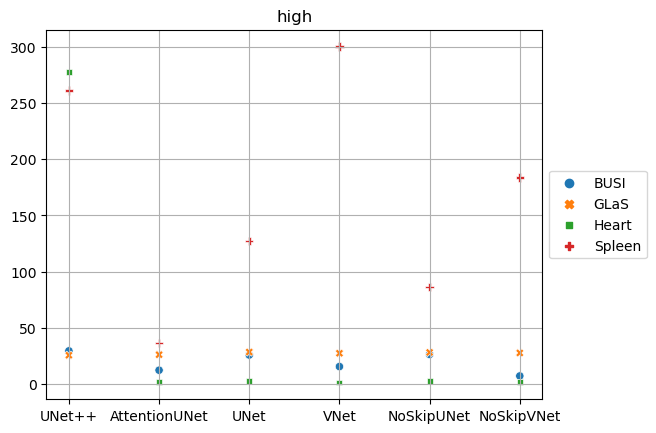

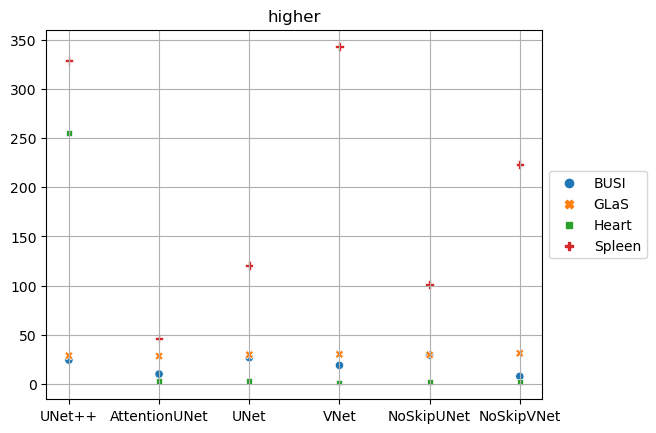

<Figure size 640x480 with 0 Axes>

In [3]:
sdist_mean_data = {}
sdist_std_data = {}

for texture_variant in ["lower", "low", "in-domain", "high", "higher"]:
    sdist_mean = pd.DataFrame(columns=model_list,
                    index=anatomy_list)

    sdist_sd = pd.DataFrame(columns=model_list,
                    index=anatomy_list)

    for anatomy in anatomy_list:
        for model_name in model_list:
            result_seed_1 = os.path.join(results_path, anatomy + "-results", anatomy + "_stats_" + model_name + "_" + texture_variant + "_256_1.csv")
            result_seed_2 = os.path.join(results_path, anatomy + "-results", anatomy + "_stats_" + model_name + "_" + texture_variant + "_256_2.csv")
            result_seed_3 = os.path.join(results_path, anatomy + "-results", anatomy + "_stats_" + model_name + "_" + texture_variant + "_256_3.csv")

            seed_1_data = pd.read_csv(result_seed_1)
            seed_1_data = seed_1_data.loc[seed_1_data['Set'] == "test"]

            seed_2_data = pd.read_csv(result_seed_2)
            seed_2_data = seed_2_data.loc[seed_2_data['Set'] == "test"]

            seed_3_data = pd.read_csv(result_seed_3)
            seed_3_data = seed_3_data.loc[seed_3_data['Set'] == "test"]

            sdist_scores = np.hstack((seed_1_data["SurfaceDistance"].to_numpy(), seed_2_data["SurfaceDistance"].to_numpy(), seed_3_data["SurfaceDistance"].to_numpy()))
            sdist_scores[~np.isfinite(sdist_scores)] = np.sqrt(2) * 256

            #print("For anatomy: " + anatomy + " and model: " + model_name + " and texture: " + texture_variant + ", sdist mean: " + str(np.nanmean(sdist_scores)) + ", std: " + str(np.nanstd(sdist_scores)))

            sdist_mean[model_name][anatomy] = np.mean(sdist_scores)
            sdist_sd[model_name][anatomy] = np.std(sdist_scores)
    
    sdist_mean_data[texture_variant] = sdist_mean
    sdist_std_data[texture_variant] = sdist_sd
    
    print("For texture variant: " + str(texture_variant) + " mean scores;")
    print(sdist_mean)
    print("For texture variant: " + str(texture_variant) + " std scores;")
    print(sdist_sd)
    ax = sns.scatterplot(data=sdist_mean.T)
    ax.set_title(str(texture_variant))
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.grid(True)
    plt.figure()


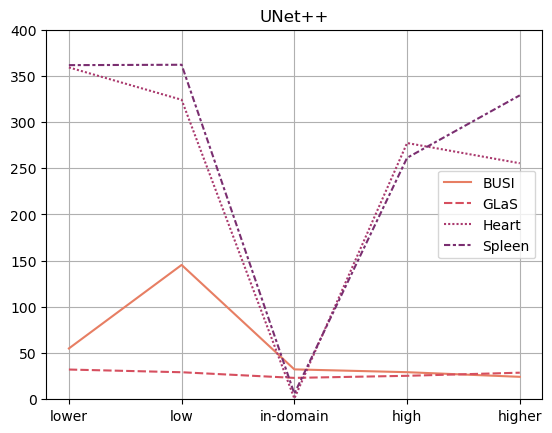

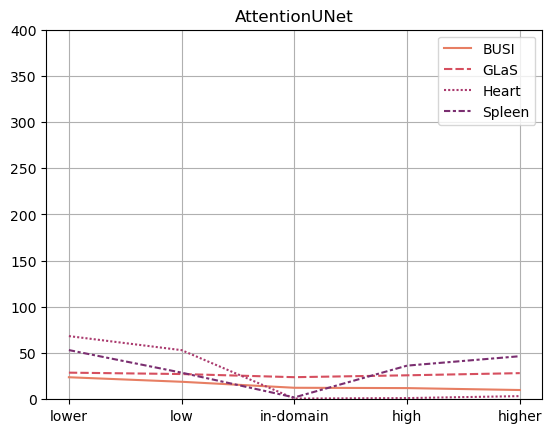

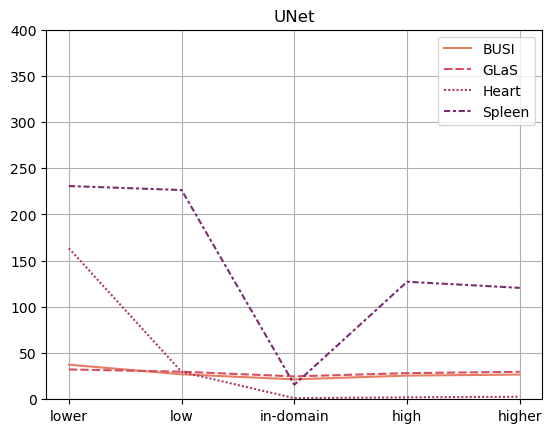

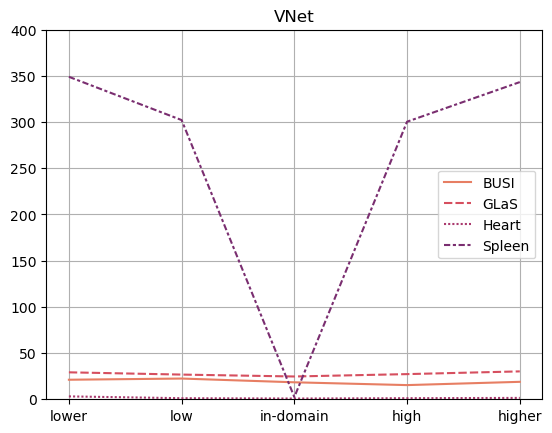

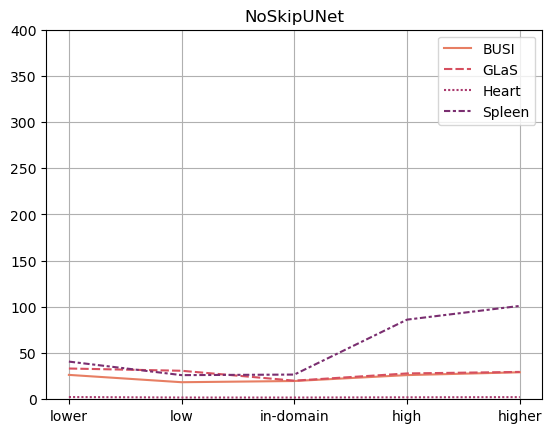

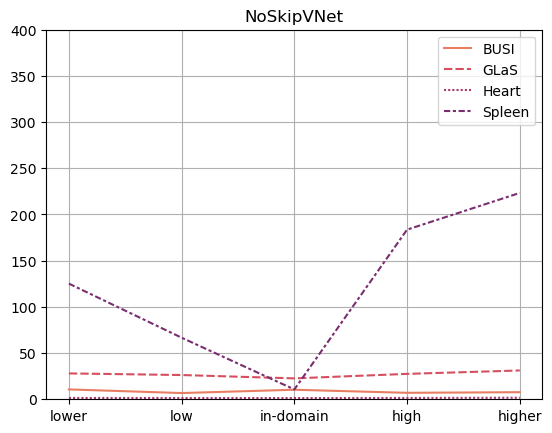

In [4]:
for model_type in model_list:
    results_by_image = {}
    for image_type in anatomy_list:
        mean_line = []
        for variant in variant_list:
            mean_line.append(sdist_mean_data[variant][model_type][image_type])

        results_by_image[image_type] = mean_line

    plt.figure()
    df = pd.DataFrame.from_dict(results_by_image, columns=variant_list, orient='index')
    sns.lineplot(data=df.T, palette='flare')
    plt.title(model_type)
    plt.grid(True)
    plt.ylim([0, 400])

/tmp/ipykernel_4183888/2879141022.py:18: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(data=df.T, x=df.T.index, y="Mean", palette='flare')
/tmp/ipykernel_4183888/2879141022.py:18: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(data=df.T, x=df.T.index, y="Mean", palette='flare')
/tmp/ipykernel_4183888/2879141022.py:18: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(data=df.T, x=df.T.index, y="Mean", palette='flare')
/tmp/ipykernel_4183888/2879141022.py:18: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(data=df.T, x=df.T.index, y="Mean", palette='flare')
/tmp/ipykernel_4183888/2879141022.py:18: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(data=df.T, x=df.T.index, y="Mean", palette='flare')
/tmp/ipykernel_4183888/2879141022.py:18: UserWarni

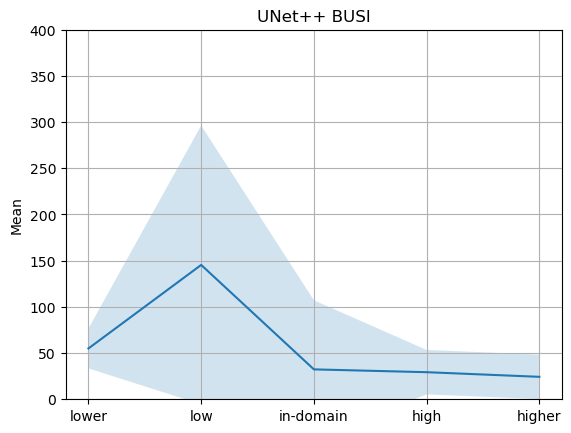

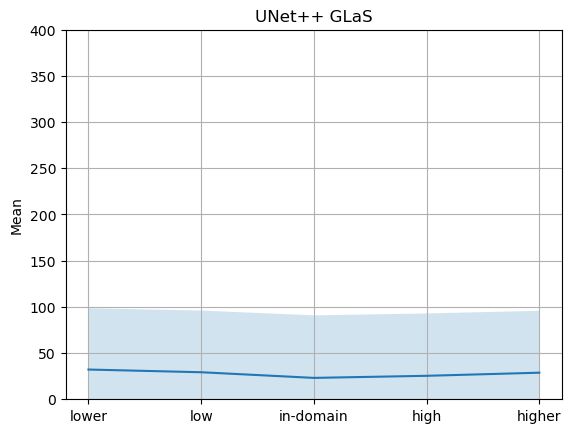

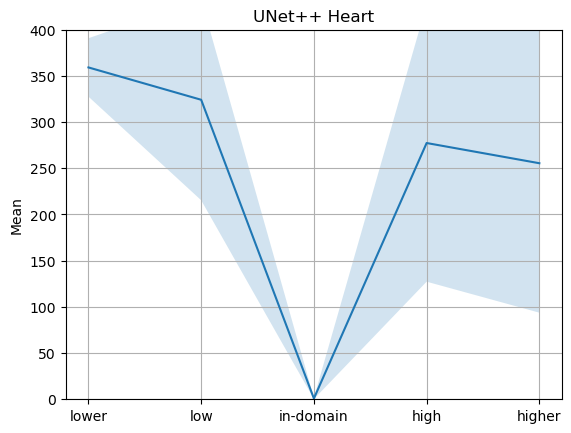

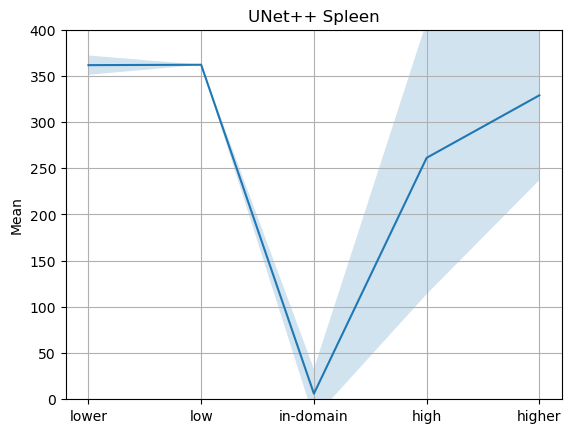

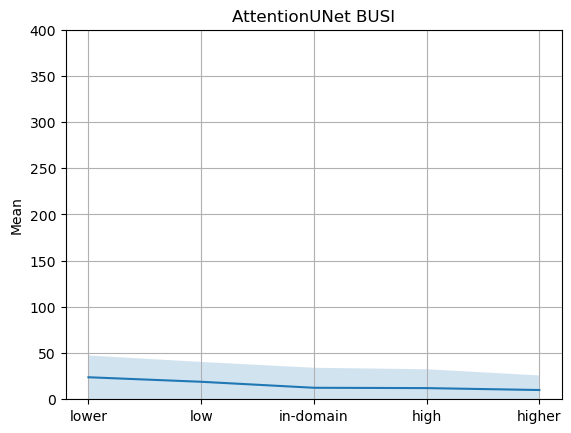

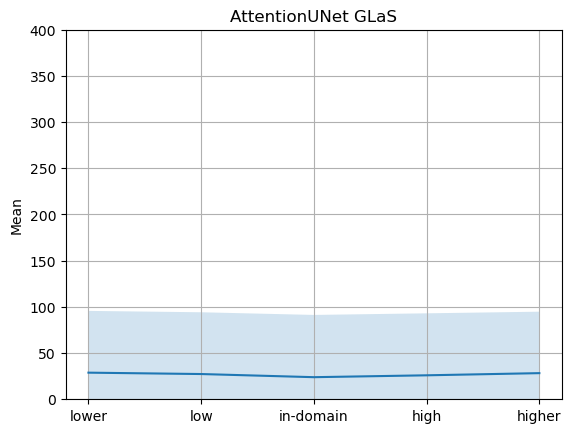

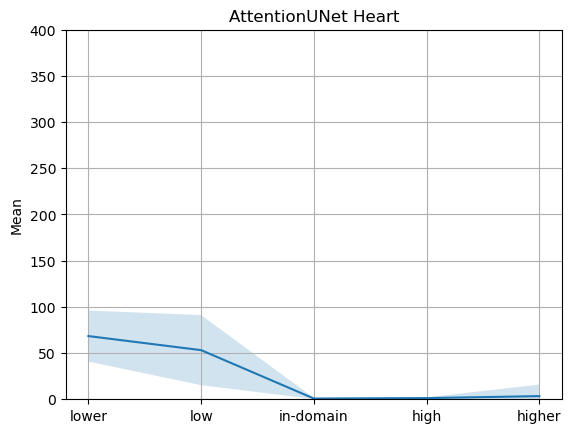

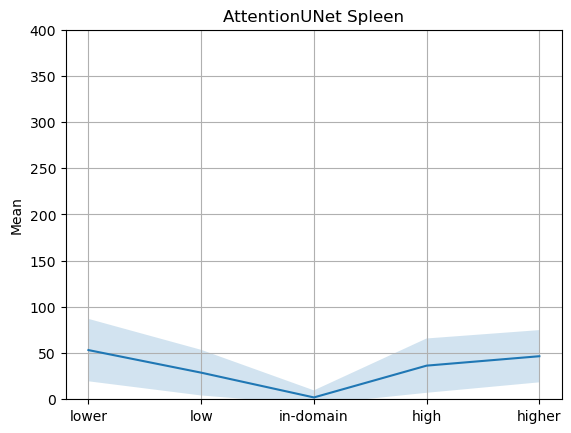

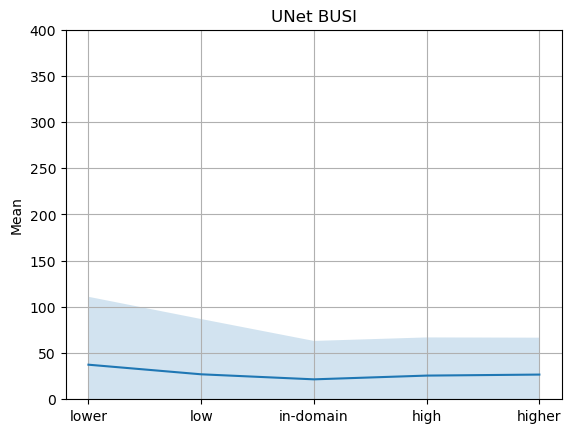

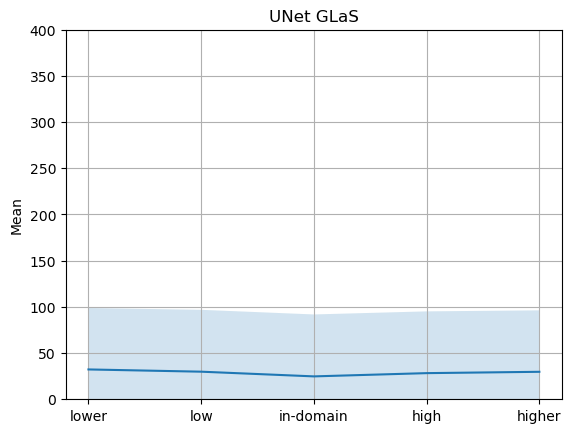

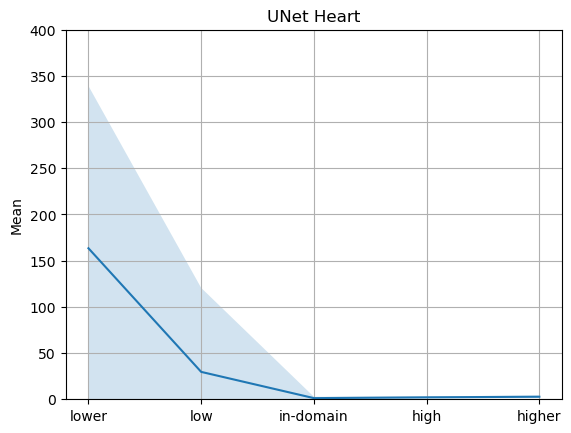

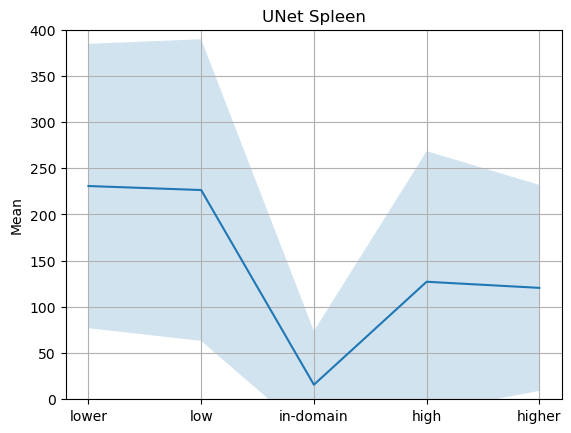

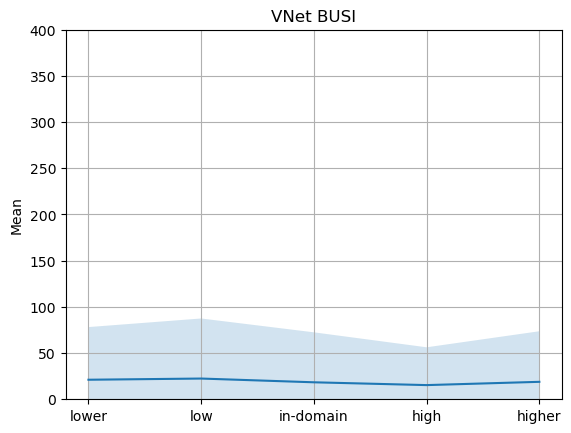

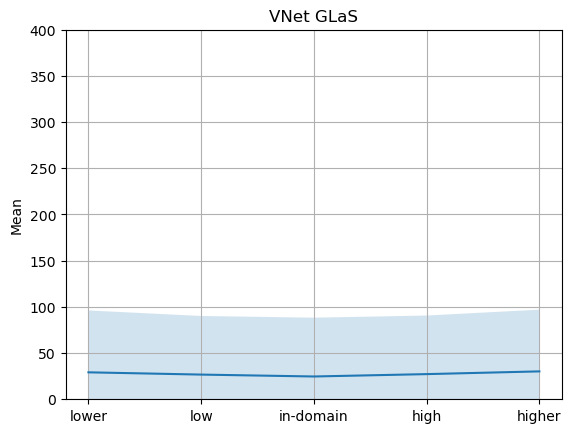

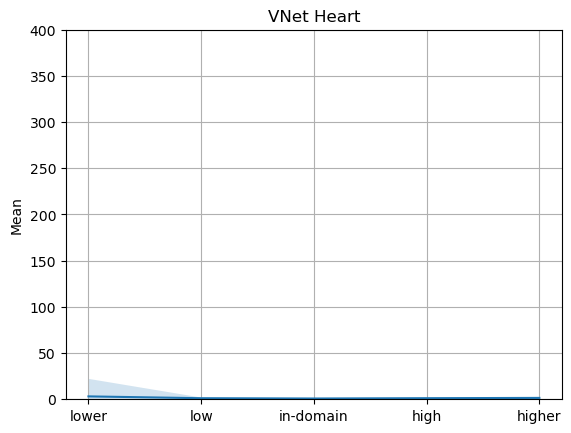

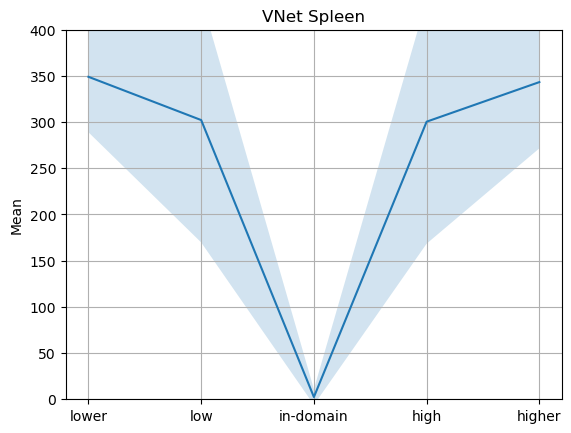

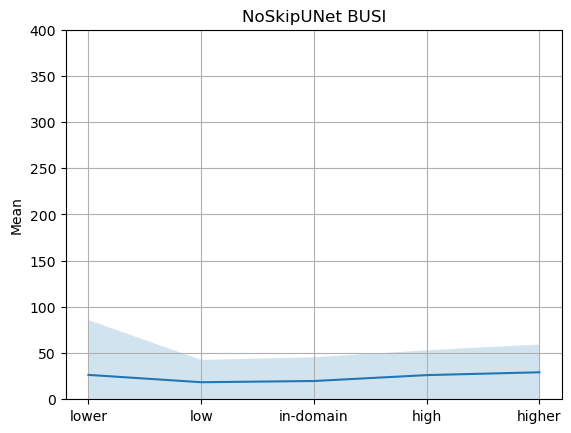

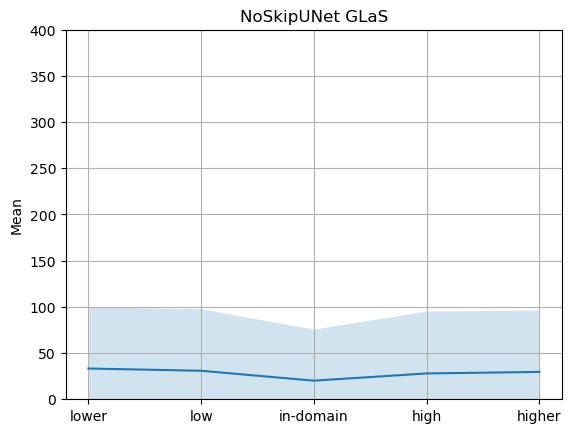

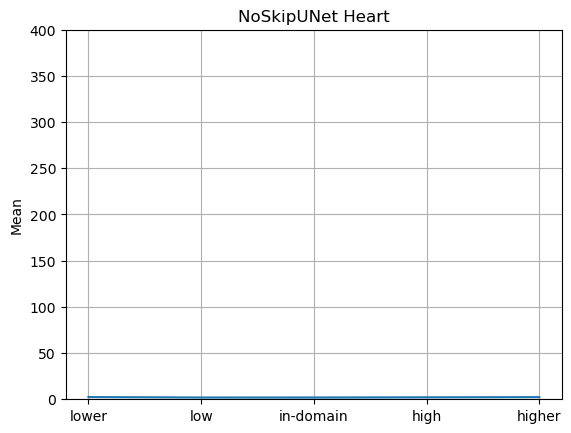

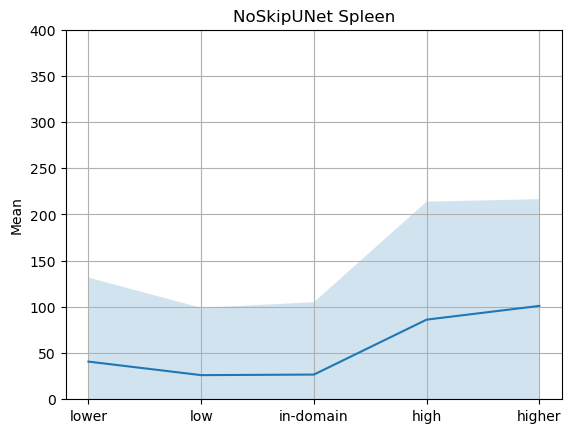

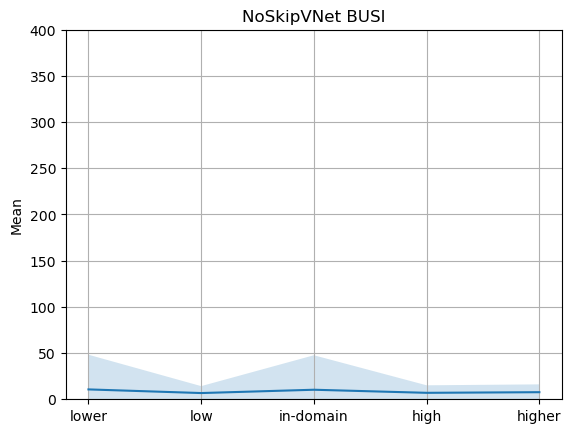

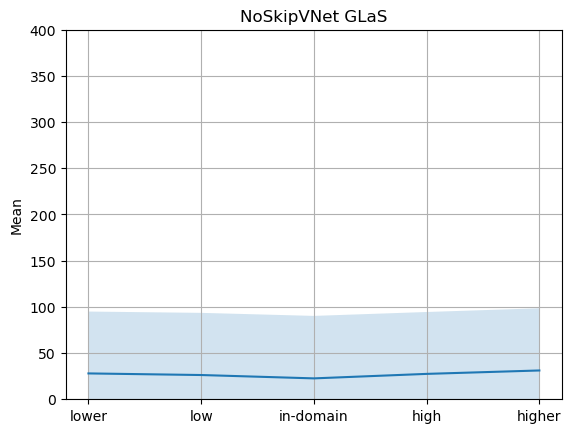

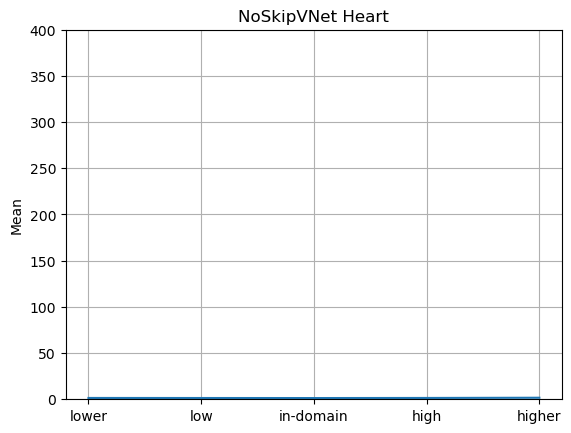

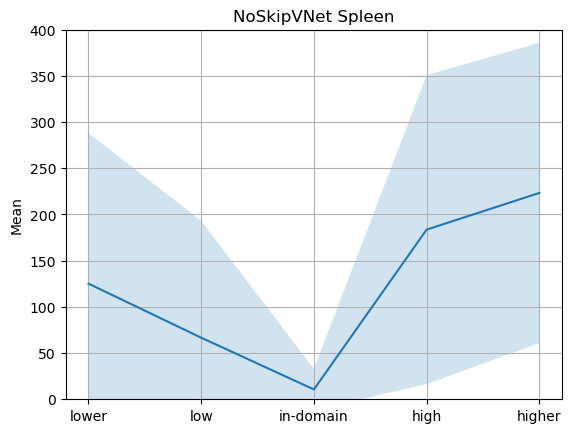

In [5]:
for model_type in model_list:
    for image_type in anatomy_list:
        results_by_image = {}
        mean_line = []
        std_lower = []
        std_higher = []
        for variant in variant_list:
            mean_line.append(sdist_mean_data[variant][model_type][image_type])
            std_lower.append(sdist_mean_data[variant][model_type][image_type] - sdist_std_data[variant][model_type][image_type])
            std_higher.append(sdist_mean_data[variant][model_type][image_type] + sdist_std_data[variant][model_type][image_type])

        results_by_image["Mean"] = mean_line
        results_by_image["Lower"] = std_lower
        results_by_image["Higher"] = std_higher

        plt.figure()
        df = pd.DataFrame.from_dict(results_by_image, columns=variant_list, orient='index')
        ax = sns.lineplot(data=df.T, x=df.T.index, y="Mean", palette='flare')
        ax.fill_between(df.T.index, df.T.Lower, df.T.Higher, alpha=0.2)
        plt.title(model_type + " " + image_type)
        plt.grid(True)
        plt.ylim([0, 400])